In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # 스레드 수를 1로 설정
import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))
from src.pre_process.feature_add import FeatureAddition
from src.pre_process.feature_duplicate import FeatureDuplication
BASE_PATH = r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\data\etc'

In [2]:
data = pd.read_csv(os.path.join(BASE_PATH,'v4_baek+recent+rank.csv'))

In [3]:
data.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 'original_index',
       'recent_deposit', 'interest_rate', 'diff_interest_rate']

---

In [4]:
columns_needed = [
       # 'index', '_type', 'area_price', 'area_m2_price','contract_type', 'contract_2','built_year',
       'area_m2', 'contract_year_month', 'contract_day', 
       'floor', 'built_year', 'latitude', 'longitude', 'age', 'area_m2_price',
    #    'contract_0', 'contract_1',
       'deposit', 
       'apt_idx', 
       'area',
       'grid_id', 
    #    'nearest_subway_distance', 'nearest_subway_idx',
    #    'num_subway_within_1km', 'category_interchange_within_1km',
    #    'num_subway_within_500m', 'category_interchange_within_500m',
    #    'nearest_elementary_school_distance', 'nearest_elementary_school_within_1km',
    #    'has_elementary_school_within_1km', 'nearest_middle_school_distance',
    #    'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
    #    'nearest_high_school_distance', 'nearest_high_school_within_1km',
    #    'has_high_school_within_1km', 'nearest_park_distance',
    #    'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 
       'recent_deposit',
    #    'arima_deposit_index',
       # 'interest_rate', 'diff_interest_rate'
       ]

In [5]:
data = data[columns_needed]

In [6]:
import matplotlib.pyplot as plt
from pyproj import Proj
from pyproj import Transformer

In [7]:
# UTM 좌표계로 변환하는 함수
def latlon_to_utm(lat, lon):
    # WGS84에서 UTM으로 변환하는 Transformer 생성 (zone은 지역에 맞게 설정)
    transformer = Transformer.from_crs("epsg:4326", "epsg:32652")  # 여기서 zone은 52로 설정 (한국 지역 예시)
    utm_x, utm_y = transformer.transform(lat, lon)
    return utm_x, utm_y

In [9]:
grid_size = 3000

In [8]:
from tqdm import tqdm
tqdm.pandas()  # tqdm과 pandas의 결합

data['utm_x'], data['utm_y'] = zip(
    *data.progress_apply(lambda row: latlon_to_utm(row['latitude'], row['longitude']), axis=1))


100%|██████████| 1951400/1951400 [10:01<00:00, 3245.51it/s]


NameError: name 'grid_size' is not defined

In [10]:
data['grid_x'] = (data['utm_x'] // grid_size).astype(int)
data['grid_y'] = (data['utm_y'] // grid_size).astype(int)

In [11]:
data

,area_m2,contract_year_month,contract_day,floor,built_year,latitude,longitude,age,area_m2_price,deposit,apt_idx,area,grid_id,apt_deposit_rank,apt_area_deposit_rank,recent_deposit,utm_x,utm_y,grid_x,grid_y
0,84.9981,201906,25,9,2019,37.054314,127.045216,0,200.004471,17000.0,0,25.8,25581.836691,7683,29300,NaN,326185.513212,4.102685e+06,108,1367
1,84.9981,202003,26,20,2019,37.054314,127.045216,1,270.594284,23000.0,0,25.8,25581.836691,7683,29300,17000.0,326185.513212,4.102685e+06,108,1367
2,84.9981,202003,28,8,2019,37.054314,127.045216,1,270.594284,23000.0,0,25.8,25581.836691,7683,29300,23000.0,326185.513212,4.102685e+06,108,1367
3,59.3400,201907,15,1,1986,36.964647,127.055847,33,84.260195,5000.0,1,18.0,18375.213675,18366,58901,NaN,326927.596059,4.092717e+06,108,1364
4,59.8100,201904,12,6,1995,36.972390,127.084514,24,30.095302,1800.0,2,18.1,12627.879781,18369,58863,NaN,329497.144808,4.093524e+06,109,1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,115.5101,202402,27,17,2010,37.528394,126.659398,14,NaN,NaN,17869,35.0,33310.656662,6088,25360,37000.0,293177.441303,4.156066e+06,97,1385
1951396,142.8738,202403,2,4,2010,37.528394,126.659398,14,NaN,NaN,17869,43.3,33310.656662,6088,17911,43000.0,293177.441303,4.156066e+06,97,1385
1951397,142.8738,202403,16,13,2010,37.528394,126.659398,14,NaN,NaN,17869,43.3,33310.656662,6088,17911,43000.0,293177.441303,4.156066e+06,97,1385
1951398,114.9285,202403,22,2,2010,37.528394,126.659398,14,NaN,NaN,17869,34.8,33310.656662,6088,24128,32500.0,293177.441303,4.156066e+06,97,1385


In [12]:
data.to_csv('grid.csv',index=False)

In [13]:
grid_area_deposit = data.groupby(['grid_x','grid_y'])['area_m2_price'].mean().reset_index()

In [14]:
grid_area_deposit

,grid_x,grid_y,area_m2_price
0,92,1383,205.994079
1,92,1384,270.153338
2,92,1389,93.589744
3,92,1392,160.065188
4,92,1393,169.324085
...,...,...,...
485,126,1369,135.398032
486,126,1374,171.401562
487,126,1375,250.034849
488,126,1376,229.849273


In [15]:
df = pd.merge(data,grid_area_deposit,on=['grid_x','grid_y'],
              how='left',suffixes=('', '_grid'))

In [16]:
df

,area_m2,contract_year_month,contract_day,floor,built_year,latitude,longitude,age,area_m2_price,deposit,...,area,grid_id,apt_deposit_rank,apt_area_deposit_rank,recent_deposit,utm_x,utm_y,grid_x,grid_y,area_m2_price_grid
0,84.9981,201906,25,9,2019,37.054314,127.045216,0,200.004471,17000.0,...,25.8,25581.836691,7683,29300,NaN,326185.513212,4.102685e+06,108,1367,344.922690
1,84.9981,202003,26,20,2019,37.054314,127.045216,1,270.594284,23000.0,...,25.8,25581.836691,7683,29300,17000.0,326185.513212,4.102685e+06,108,1367,344.922690
2,84.9981,202003,28,8,2019,37.054314,127.045216,1,270.594284,23000.0,...,25.8,25581.836691,7683,29300,23000.0,326185.513212,4.102685e+06,108,1367,344.922690
3,59.3400,201907,15,1,1986,36.964647,127.055847,33,84.260195,5000.0,...,18.0,18375.213675,18366,58901,NaN,326927.596059,4.092717e+06,108,1364,205.635511
4,59.8100,201904,12,6,1995,36.972390,127.084514,24,30.095302,1800.0,...,18.1,12627.879781,18369,58863,NaN,329497.144808,4.093524e+06,109,1364,173.621248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,115.5101,202402,27,17,2010,37.528394,126.659398,14,NaN,NaN,...,35.0,33310.656662,6088,25360,37000.0,293177.441303,4.156066e+06,97,1385,375.323861
1951396,142.8738,202403,2,4,2010,37.528394,126.659398,14,NaN,NaN,...,43.3,33310.656662,6088,17911,43000.0,293177.441303,4.156066e+06,97,1385,375.323861
1951397,142.8738,202403,16,13,2010,37.528394,126.659398,14,NaN,NaN,...,43.3,33310.656662,6088,17911,43000.0,293177.441303,4.156066e+06,97,1385,375.323861
1951398,114.9285,202403,22,2,2010,37.528394,126.659398,14,NaN,NaN,...,34.8,33310.656662,6088,24128,32500.0,293177.441303,4.156066e+06,97,1385,375.323861


In [17]:
df.rename(columns={'area_m2_price_grid':'grid_area_deposit'},inplace=True)

In [18]:
df[['deposit','grid_id','grid_area_deposit']].corr()

,deposit,grid_id,grid_area_deposit
deposit,1.000000,0.676606,0.652789
grid_id,0.676606,1.000000,0.964751
grid_area_deposit,0.652789,0.964751,1.000000


In [25]:
df['grid_area_deposit'].to_csv('grid_area_deposit.csv',index=False)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

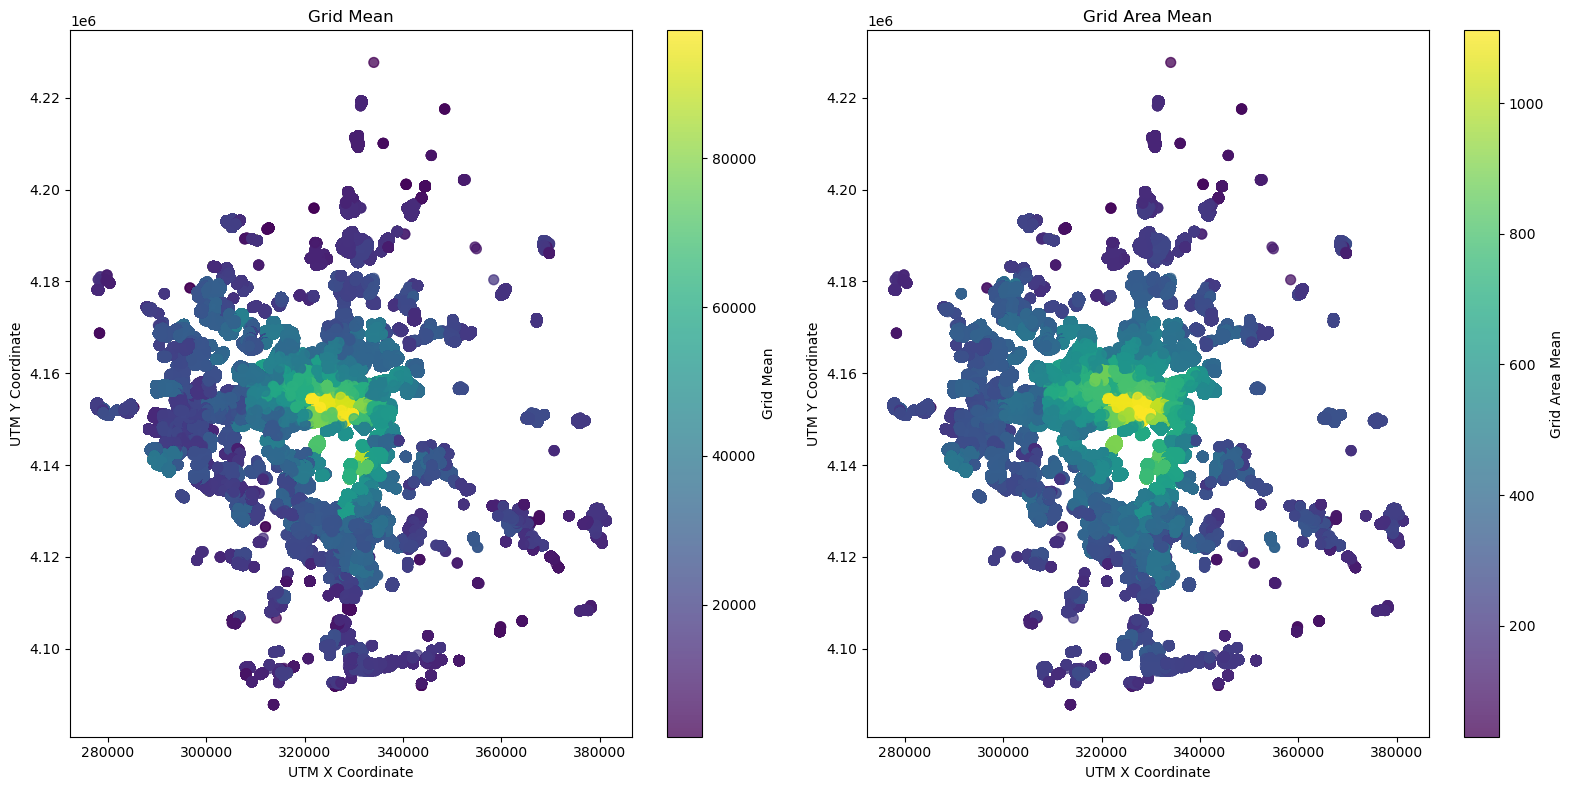

In [22]:
columns_to_plot = ['grid_id', 'grid_area_deposit']
titles = ['Grid Mean', 'Grid Area Mean']

# 1x2 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

for i, col in enumerate(columns_to_plot):
    scatter = axs[i].scatter(df['utm_x'], df['utm_y'], 
                             c=df[col], cmap='viridis', s=50, alpha=0.75)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('UTM X Coordinate')
    axs[i].set_ylabel('UTM Y Coordinate')
    fig.colorbar(scatter, ax=axs[i], label=titles[i])

# 그래프 간의 레이아웃 조정
plt.tight_layout()
plt.show()